<a href="https://colab.research.google.com/github/heidaralavi/APC-PRJ/blob/main/APC-PRJ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# گندله سازی اردکان
بررسی ارتباط پارامترهای ورودی به میکسرهای 
و گندله خروجی

ابتدا توابع مورد نیاز را ایمپورت می کنیم

In [ ]:
!pip install xgboost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest,RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import scale , normalize, minmax_scale
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import xgboost as xgb

داده های ورودی را که شامل پارامترهای کنسانتره ورودی به میکسر است را وارد می کنیم

In [2]:
url = 'https://raw.githubusercontent.com/heidaralavi/APC-PRJ/main/input-data.csv'
i_df=pd.read_csv(url)
#i_df=pd.read_csv('input-data.csv')

In [3]:
i_df

,Blaine,Co-Tfe%,Co-FeO%,Co-SiO2%,Co-CaO%,Co-MgO%,Co-AL2O3%,Co-P%,Co-MnO%,Co-TiO2%
0,1823.333333,67.460000,22.820000,3.029500,0.638000,0.426000,0.497000,0.091000,0.0310,0.222000
1,1837.333333,67.536667,22.656667,2.968333,0.673600,0.442567,0.492200,0.100900,0.0285,0.223267
2,1712.333333,67.650000,22.663333,2.838333,0.604900,0.392067,0.449533,0.088167,0.0272,0.270367
3,1794.333333,67.653333,22.506667,2.899667,0.622367,0.430867,0.485933,0.094567,0.0293,0.245033
4,1807.666667,67.490000,23.446667,3.013000,0.642667,0.401000,0.443333,0.094333,0.0310,0.213000
...,...,...,...,...,...,...,...,...,...,...
165,1737.333333,67.553333,23.476667,2.949000,0.659333,0.393667,0.559000,0.108000,0.0250,0.239333
166,1715.000000,67.486667,23.556667,3.085333,0.655667,0.448333,0.607000,0.104667,0.0270,0.214667
167,1707.000000,67.666667,22.693333,3.148000,0.632000,0.387000,0.604000,0.102000,0.0270,0.243000
168,1730.000000,67.930000,22.986667,2.900500,0.590500,0.381000,0.531500,0.096500,0.0255,0.242500


داده های گندله خروجی را وارد می کنیم

In [4]:
url = 'https://raw.githubusercontent.com/heidaralavi/APC-PRJ/main/output-data.csv'
o_df=pd.read_csv(url)
#o_df=pd.read_csv('output-data.csv')

In [5]:
o_df

,PL-CCS kg/pl,PL-Tfe%,PL-FeO%,>16 mm,9-16 mm,6.3-9mm,<6.3 mm,Tumble%,Abrasion%,Porosity%,PL-SiO2%,PL-AL2O3%,PL-P%,PL-MnO%,PL-TiO2%,PL-CaO%,PL-MgO%
0,287,65.46,0.47,8.05,83.25,7.50,1.20,97.28,1.75,20.94,3.55,0.63,0.09,0.03,0.21,0.64,0.42
1,258,65.49,0.53,7.41,88.18,4.00,0.41,96.80,2.39,22.51,3.52,0.65,0.10,0.03,0.22,0.66,0.43
2,298,65.62,0.63,8.47,86.61,4.43,0.49,97.55,2.01,20.90,3.59,0.62,0.09,0.03,0.27,0.62,0.41
3,312,65.66,0.99,5.75,88.81,5.00,0.44,97.75,1.69,19.15,3.68,0.65,0.09,0.03,0.22,0.63,0.42
4,314,65.56,0.89,7.68,88.31,3.47,0.54,97.40,2.00,19.43,3.66,0.61,0.09,0.03,0.21,0.66,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,311,65.73,0.64,8.97,86.64,3.68,0.70,96.79,2.37,21.14,3.42,0.64,0.11,0.03,0.26,0.67,0.45
166,305,65.79,0.59,7.72,87.70,4.09,0.48,97.02,2.29,20.35,3.41,0.64,0.10,0.03,0.28,0.66,0.44
167,305,65.90,0.73,6.35,89.75,3.47,0.43,97.11,2.21,20.60,3.30,0.61,0.10,0.03,0.23,0.61,0.38
168,294,65.92,0.58,5.38,90.02,3.51,1.10,97.61,1.74,21.76,3.27,0.61,0.09,0.03,0.20,0.60,0.39


یکی از ستون های گندله را به انتهای پارامترهای کنسانتره اضافه می کنیم و دیتافریم جدید می سازیم

In [6]:
df=pd.concat([i_df, o_df.iloc[:,8]], axis=1)

In [7]:
df

,Blaine,Co-Tfe%,Co-FeO%,Co-SiO2%,Co-CaO%,Co-MgO%,Co-AL2O3%,Co-P%,Co-MnO%,Co-TiO2%,Abrasion%
0,1823.333333,67.460000,22.820000,3.029500,0.638000,0.426000,0.497000,0.091000,0.0310,0.222000,1.75
1,1837.333333,67.536667,22.656667,2.968333,0.673600,0.442567,0.492200,0.100900,0.0285,0.223267,2.39
2,1712.333333,67.650000,22.663333,2.838333,0.604900,0.392067,0.449533,0.088167,0.0272,0.270367,2.01
3,1794.333333,67.653333,22.506667,2.899667,0.622367,0.430867,0.485933,0.094567,0.0293,0.245033,1.69
4,1807.666667,67.490000,23.446667,3.013000,0.642667,0.401000,0.443333,0.094333,0.0310,0.213000,2.00
...,...,...,...,...,...,...,...,...,...,...,...
165,1737.333333,67.553333,23.476667,2.949000,0.659333,0.393667,0.559000,0.108000,0.0250,0.239333,2.37
166,1715.000000,67.486667,23.556667,3.085333,0.655667,0.448333,0.607000,0.104667,0.0270,0.214667,2.29
167,1707.000000,67.666667,22.693333,3.148000,0.632000,0.387000,0.604000,0.102000,0.0270,0.243000,2.21
168,1730.000000,67.930000,22.986667,2.900500,0.590500,0.381000,0.531500,0.096500,0.0255,0.242500,1.74


# بررسی اولیه داده ها

دیتاها را نسبت به هم ترسیم می کنیم تا دیدی کلی از داده ها بدست آوریم

<Figure size 1200x800 with 0 Axes>

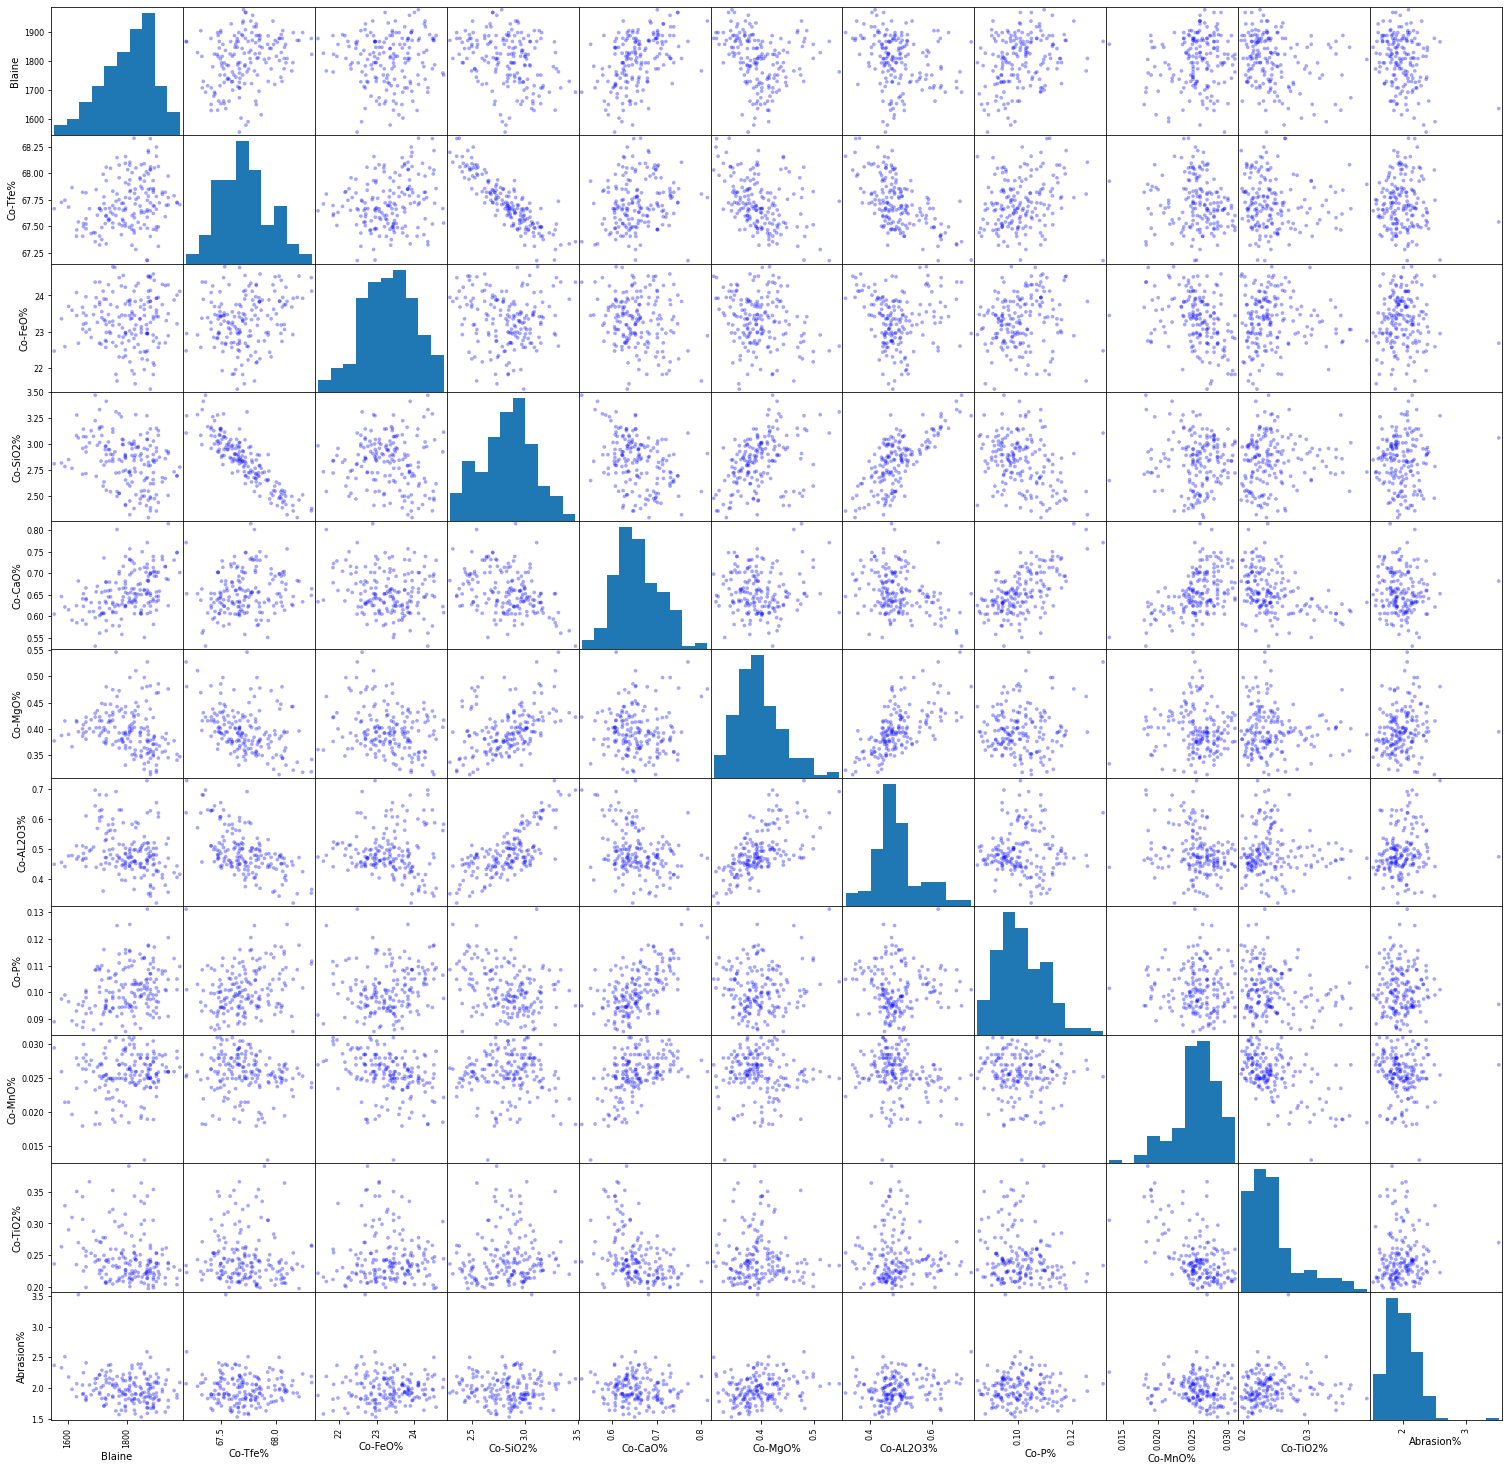

In [8]:
plt.figure(dpi=200)
pd.plotting.scatter_matrix(df, c='blue',alpha=0.35, s=55,figsize=[26,26])
plt.show()

ماتریس ضریب همبستگی دیتاها را محاسبه و ترسیم می کنیم

(11, 11)


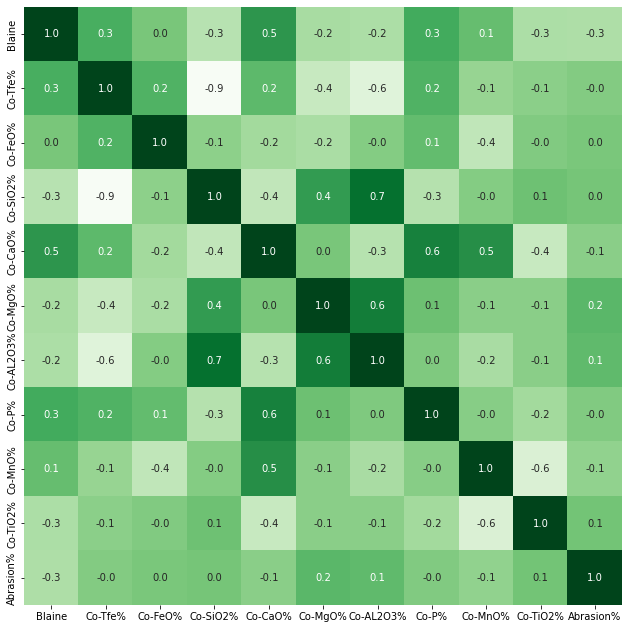

In [9]:
corr = df.corr()
print(corr.shape)
plt.figure(figsize=(11,11))
sns.heatmap(corr, cbar=False,square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

بررسی داده های از دست رفته و ناقص

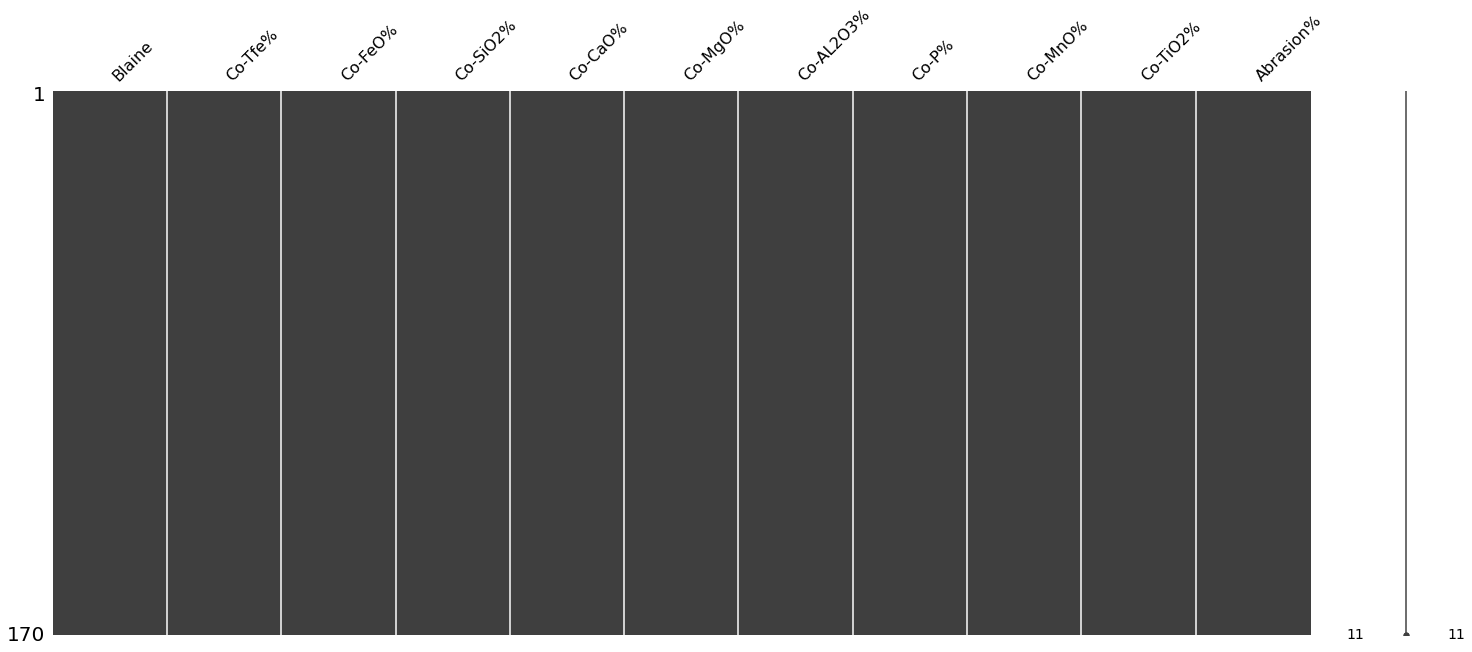

In [10]:
import missingno as msno
msno.matrix(df) # just to visualize. no missing values.

In [11]:
# It seems there are no Null Values.
# Let's Confirm
df.isnull().sum()

Blaine       0
Co-Tfe%      0
Co-FeO%      0
Co-SiO2%     0
Co-CaO%      0
Co-MgO%      0
Co-AL2O3%    0
Co-P%        0
Co-MnO%      0
Co-TiO2%     0
Abrasion%    0
dtype: int64

In [12]:
df.describe()

,Blaine,Co-Tfe%,Co-FeO%,Co-SiO2%,Co-CaO%,Co-MgO%,Co-AL2O3%,Co-P%,Co-MnO%,Co-TiO2%,Abrasion%
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1802.720588,67.717333,23.313784,2.833776,0.656131,0.397440,0.489545,0.101261,0.025549,0.246898,1.987824
std,87.995770,0.232891,0.701742,0.243584,0.048852,0.042492,0.074165,0.008444,0.003099,0.039237,0.243450
min,1554.500000,67.175000,21.430000,2.292500,0.531567,0.313000,0.322067,0.085333,0.013000,0.198000,1.530000
25%,1741.000000,67.537500,22.860000,2.670125,0.624025,0.370542,0.446483,0.094867,0.024375,0.220333,1.830000
50%,1814.000000,67.695000,23.356667,2.851000,0.651533,0.392333,0.474600,0.100167,0.025933,0.237000,1.965000
75%,1871.666667,67.852500,23.836250,2.996042,0.691583,0.421912,0.516500,0.106992,0.027625,0.259500,2.130000
max,1978.000000,68.330000,24.790000,3.473667,0.814500,0.546000,0.726000,0.131150,0.031000,0.390000,3.520000


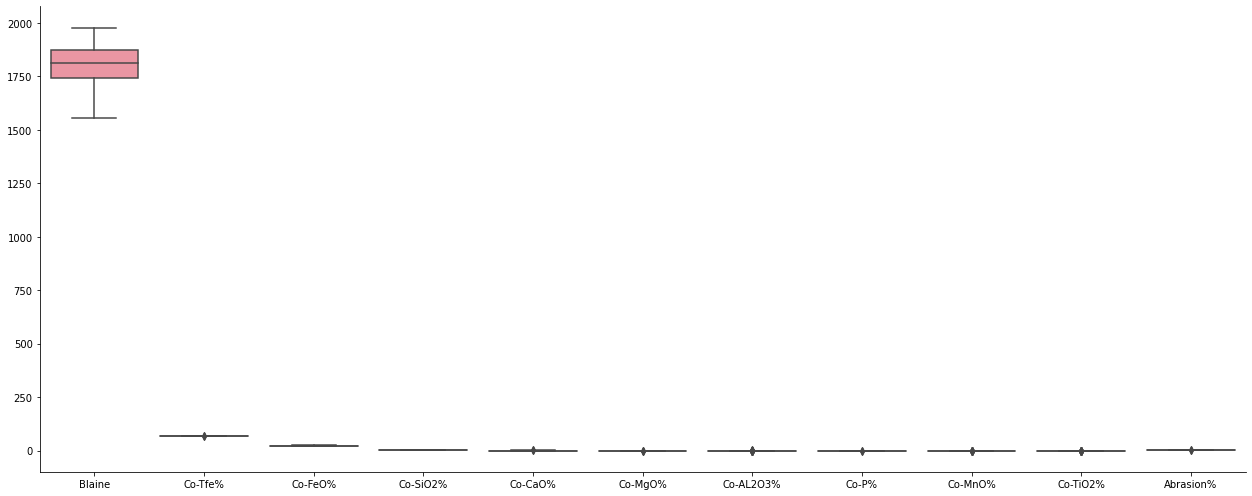

In [38]:
sns.catplot(data=df, kind='box' , height=7, aspect=2.5)

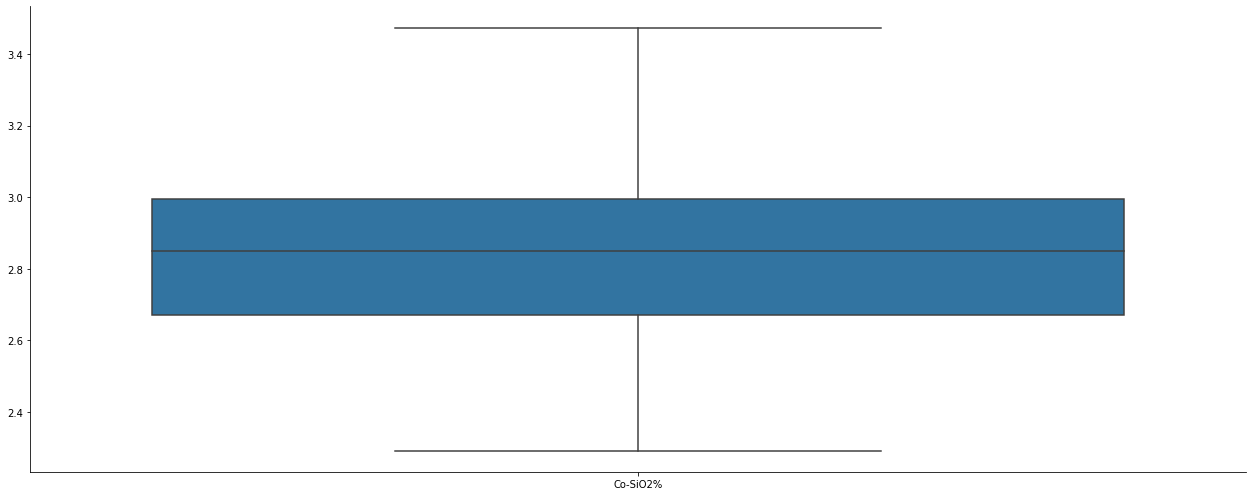

In [39]:
sns.catplot(data=df.iloc[:,3:4], kind='box' , height=7, aspect=2.5)

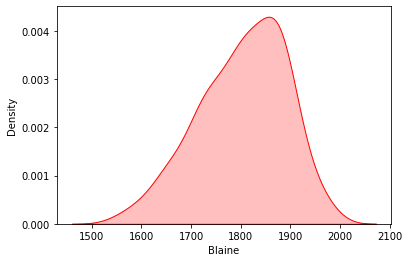

In [41]:
sns.kdeplot(df.iloc[:,0], shade=True , color='r')

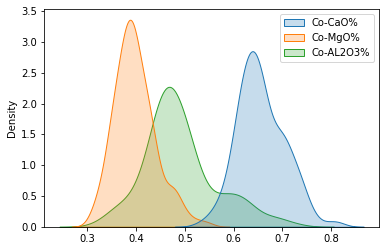

In [53]:
sns.kdeplot(data=df.iloc[:,4:7],shade=True)

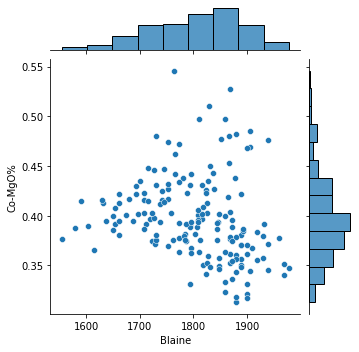

In [61]:
sns.jointplot(x=df.iloc[:,0] , y=df.iloc[:,5], data=df , height=5)

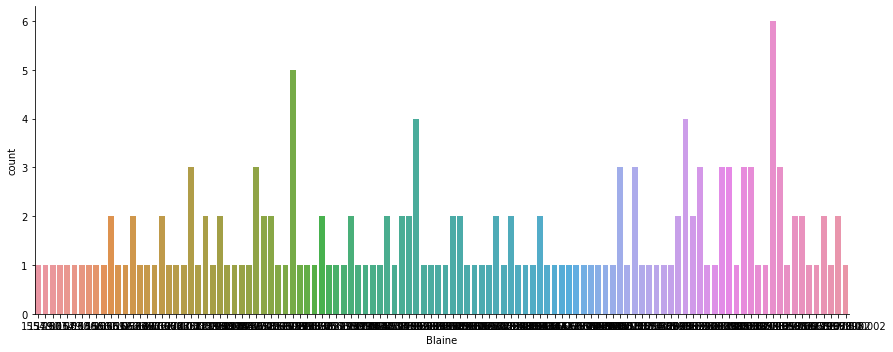

In [65]:
sns.catplot(x='Blaine', data=df , kind='count',aspect=2.5 )

In [72]:
#sns.catplot(x=df.iloc[:,1], y=df.iloc[:,4] , data=df , kind='violin', aspect=2.5)

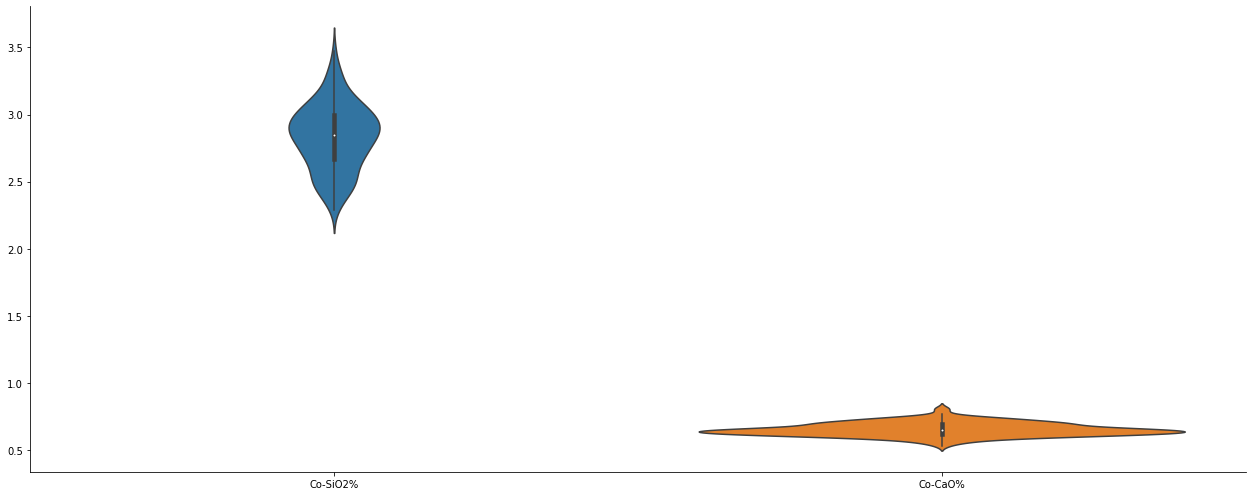

In [71]:
sns.catplot(data=df.iloc[:,3:5], kind='violin' , height=7, aspect=2.5)

# پالایش داده ها

داده های پرت و نویز را شناسایی و از دیتافریم حذف می کنیم

In [ ]:
col=df.columns
data=df.values
print(data.shape)
print(col)

(170, 11)
Index(['Blaine', 'Co-Tfe%', 'Co-FeO%', 'Co-SiO2%', 'Co-CaO%', 'Co-MgO%',
       'Co-AL2O3%', 'Co-P%', 'Co-MnO%', 'Co-TiO2%', 'Abrasion%'],
      dtype='object')


In [ ]:
# identify outliers in the dataset
iso = IsolationForest()
yhat = iso.fit_predict(data)

In [ ]:
print(yhat.shape)

(170,)


In [ ]:
# select all rows that are not outliers
mask = yhat != -1

In [ ]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

In [ ]:
data = data[mask, :]

In [ ]:
data.shape

(153, 11)

In [ ]:
not_outliers_df=pd.DataFrame(data,columns=col)

In [ ]:
not_outliers_df

,Blaine,Co-Tfe%,Co-FeO%,Co-SiO2%,Co-CaO%,Co-MgO%,Co-AL2O3%,Co-P%,Co-MnO%,Co-TiO2%,Abrasion%
0,1823.333333,67.460000,22.820000,3.029500,0.638000,0.426000,0.497000,0.091000,0.031000,0.222000,1.75
1,1837.333333,67.536667,22.656667,2.968333,0.673600,0.442567,0.492200,0.100900,0.028500,0.223267,2.39
2,1712.333333,67.650000,22.663333,2.838333,0.604900,0.392067,0.449533,0.088167,0.027200,0.270367,2.01
3,1794.333333,67.653333,22.506667,2.899667,0.622367,0.430867,0.485933,0.094567,0.029300,0.245033,1.69
4,1807.666667,67.490000,23.446667,3.013000,0.642667,0.401000,0.443333,0.094333,0.031000,0.213000,2.00
...,...,...,...,...,...,...,...,...,...,...,...
148,1700.000000,67.603333,23.263333,2.990667,0.669667,0.434667,0.568333,0.109667,0.026667,0.242667,2.16
149,1737.333333,67.553333,23.476667,2.949000,0.659333,0.393667,0.559000,0.108000,0.025000,0.239333,2.37
150,1715.000000,67.486667,23.556667,3.085333,0.655667,0.448333,0.607000,0.104667,0.027000,0.214667,2.29
151,1707.000000,67.666667,22.693333,3.148000,0.632000,0.387000,0.604000,0.102000,0.027000,0.243000,2.21


<Figure size 1200x800 with 0 Axes>

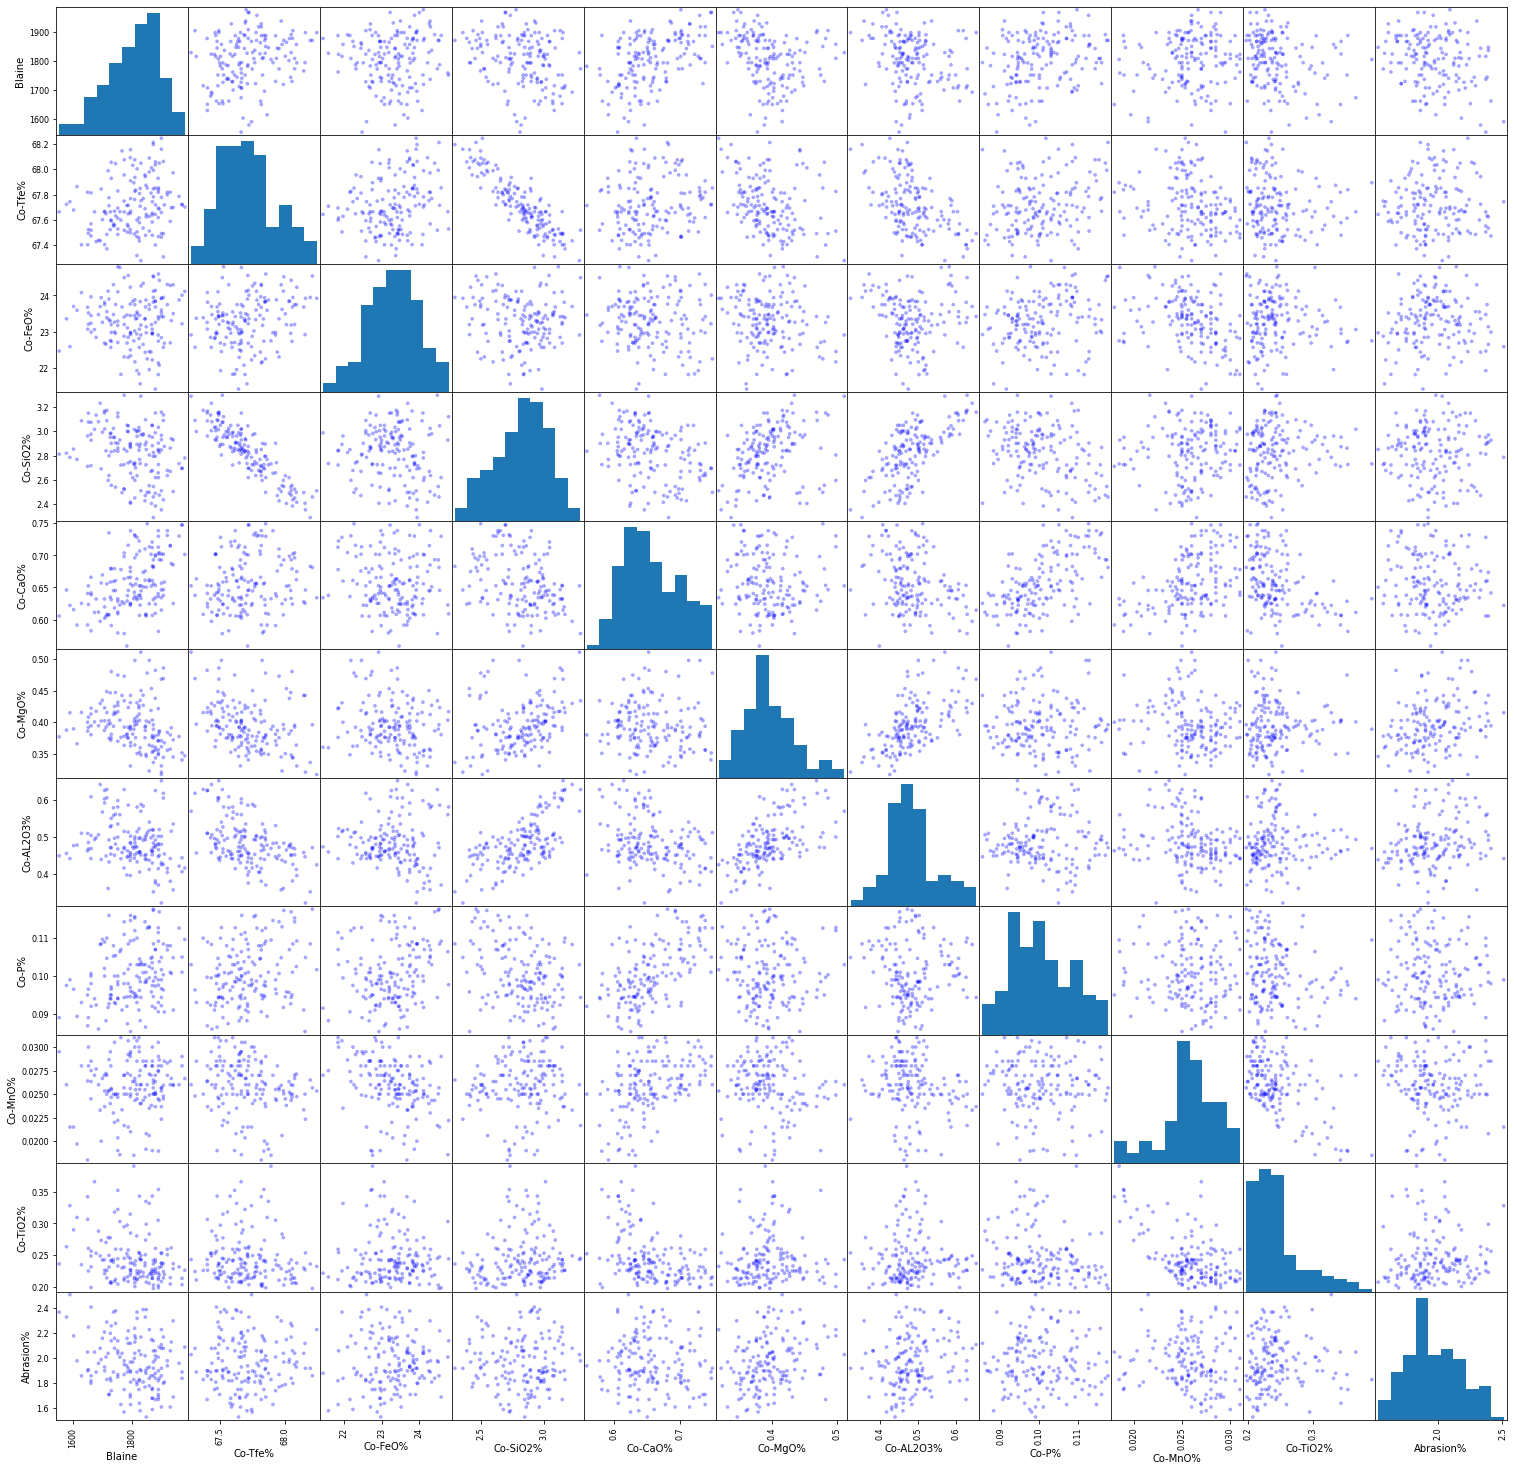

In [ ]:
plt.figure(dpi=200)
pd.plotting.scatter_matrix(not_outliers_df, c='blue',alpha=0.35, s=55,figsize=[26,26])
plt.show()

(11, 11)


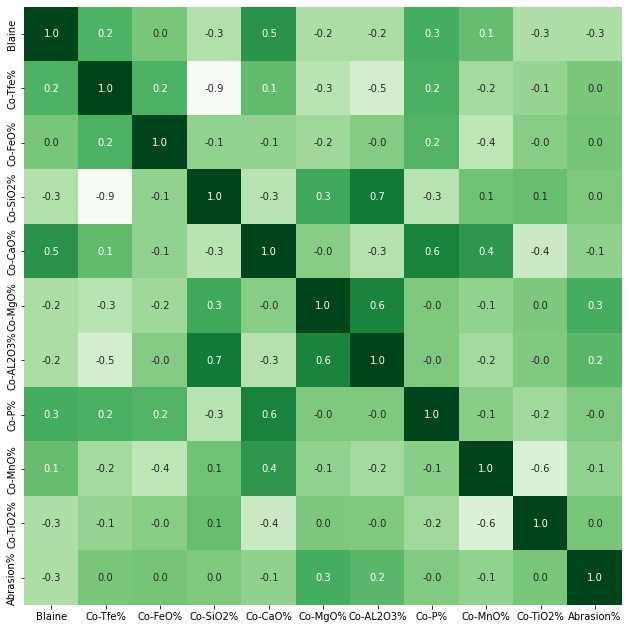

In [ ]:
corr = not_outliers_df.corr()
print(corr.shape)
plt.figure(figsize=(11,11))
sns.heatmap(corr, cbar=False,square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

# نرمالسازی داده ها

In [ ]:
data=normalize(data,norm='l2',axis=0)

In [ ]:
normal_df=pd.DataFrame(data,columns=col)

In [ ]:
normal_df

,Blaine,Co-Tfe%,Co-FeO%,Co-SiO2%,Co-CaO%,Co-MgO%,Co-AL2O3%,Co-P%,Co-MnO%,Co-TiO2%,Abrasion%
0,0.081624,0.080535,0.079161,0.086488,0.078407,0.086693,0.082091,0.072952,0.096454,0.072211,0.071630
1,0.082250,0.080627,0.078594,0.084742,0.082782,0.090065,0.081299,0.080888,0.088676,0.072623,0.097826
2,0.076655,0.080762,0.078617,0.081031,0.074339,0.079788,0.074251,0.070680,0.084631,0.087943,0.082272
3,0.080325,0.080766,0.078074,0.082782,0.076486,0.087684,0.080264,0.075811,0.091165,0.079703,0.069174
4,0.080922,0.080571,0.081335,0.086017,0.078980,0.081605,0.073227,0.075624,0.096454,0.069283,0.081863
...,...,...,...,...,...,...,...,...,...,...,...
148,0.076102,0.080706,0.080699,0.085380,0.082298,0.088457,0.093874,0.087916,0.082972,0.078933,0.088412
149,0.077774,0.080647,0.081439,0.084190,0.081029,0.080113,0.092332,0.086580,0.077786,0.077849,0.097007
150,0.076774,0.080567,0.081716,0.088082,0.080578,0.091238,0.100261,0.083908,0.084009,0.069826,0.093733
151,0.076416,0.080782,0.078721,0.089871,0.077669,0.078756,0.099765,0.081770,0.084009,0.079042,0.090458


<Figure size 1200x800 with 0 Axes>

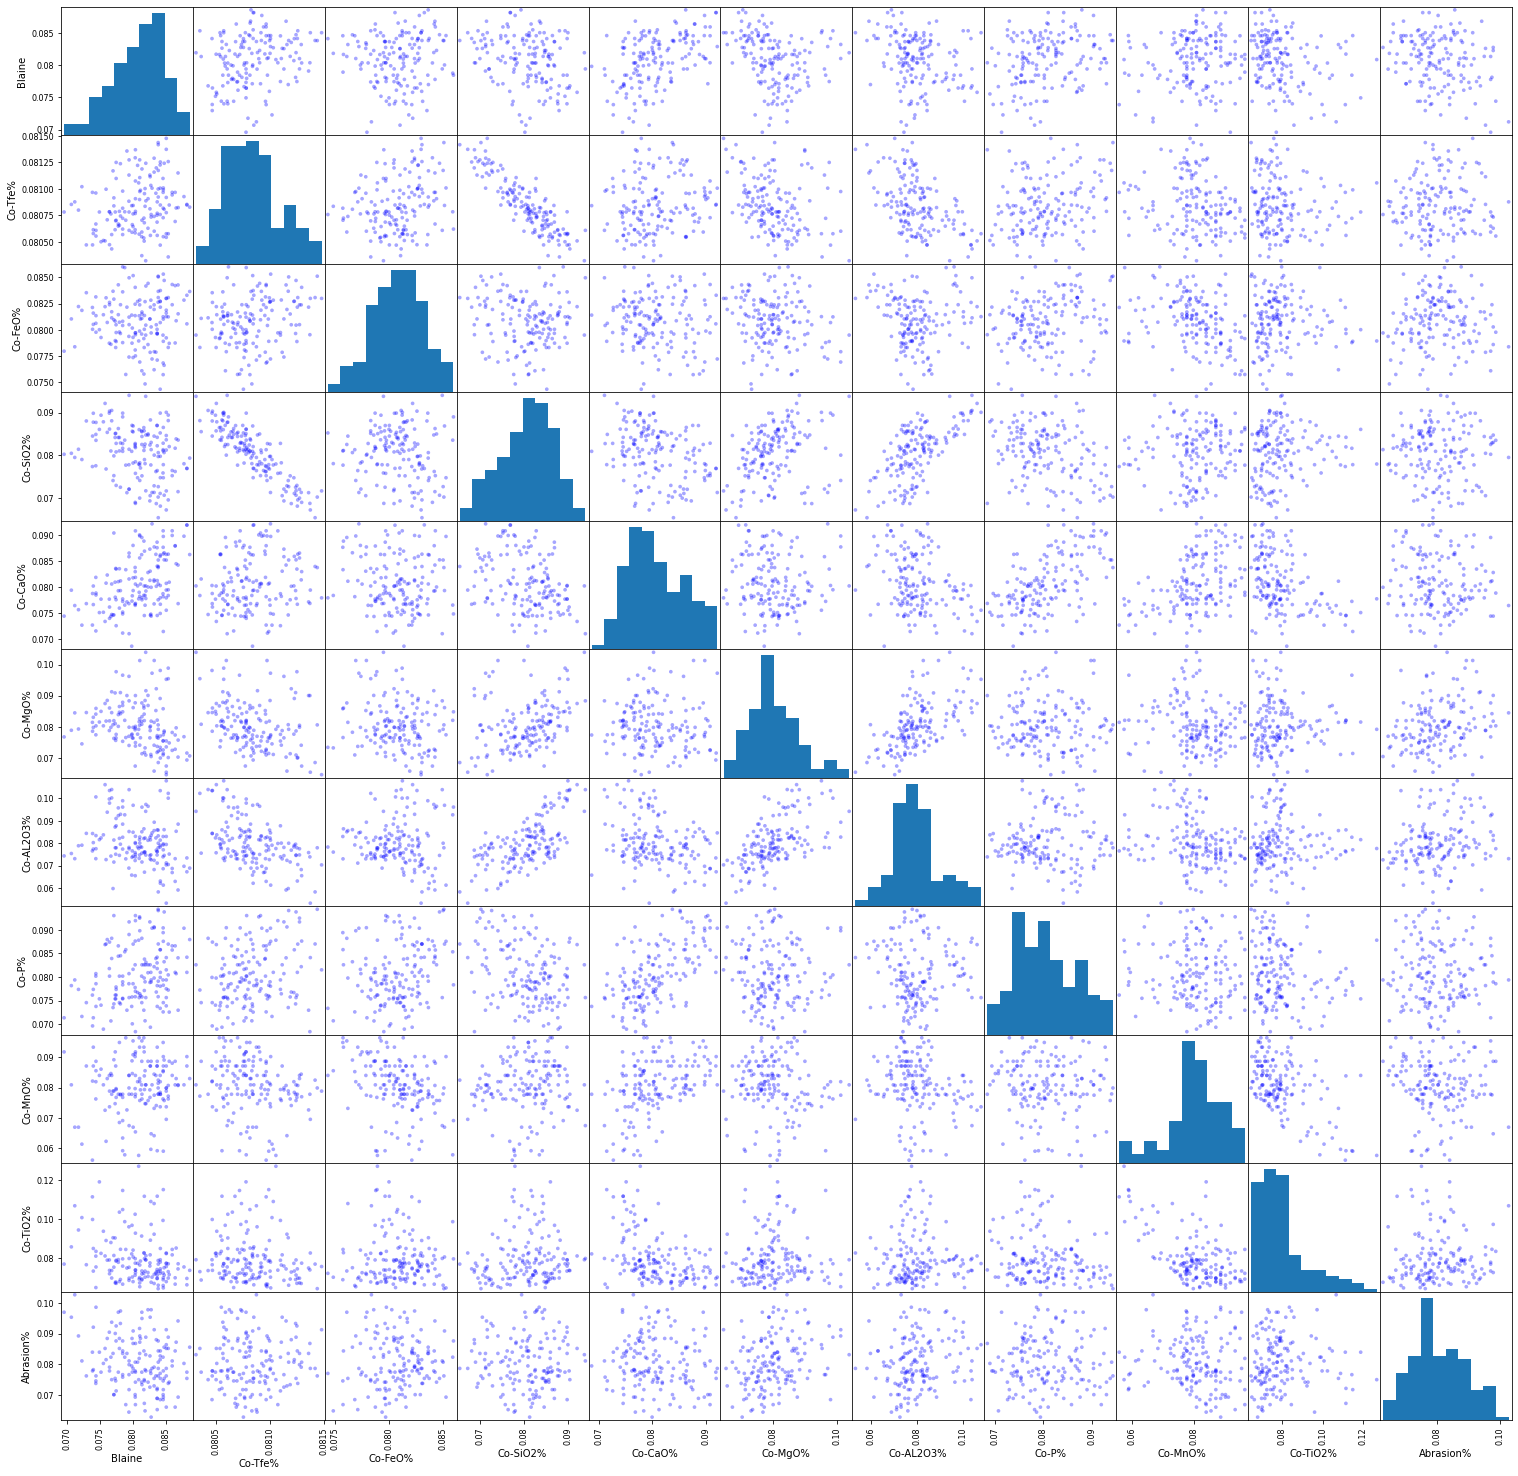

In [ ]:
plt.figure(dpi=200)
pd.plotting.scatter_matrix(normal_df, c='blue',alpha=0.35, s=55,figsize=[26,26])
plt.show()

(11, 11)


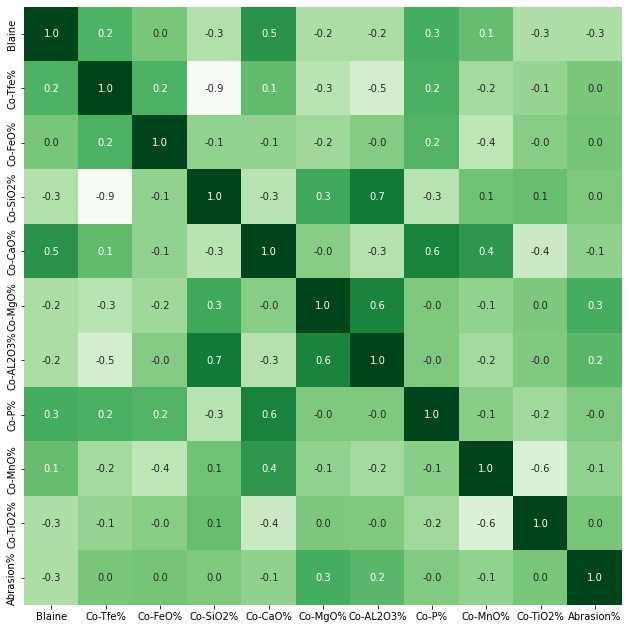

In [ ]:
corr = normal_df.corr()
print(corr.shape)
plt.figure(figsize=(11,11))
sns.heatmap(corr, cbar=False,square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

# جداسازی داده های آموزشی و تست

In [ ]:
# split into input and output elements
X, y = data[:, :-1], data[:, -1]

In [ ]:
X

array([[0.08162358, 0.08053526, 0.07916087, ..., 0.07295171, 0.09645449,
        0.07221088],
       [0.08225031, 0.08062678, 0.07859428, ..., 0.08088822, 0.0886759 ,
        0.0726229 ],
       [0.07665454, 0.08076208, 0.07861741, ..., 0.07068032, 0.08463104,
        0.08794332],
       ...,
       [0.07677392, 0.08056709, 0.08171631, ..., 0.08390783, 0.08400875,
        0.06982554],
       [0.07641579, 0.08078198, 0.07872148, ..., 0.08177005, 0.08400875,
        0.07904164],
       [0.07744541, 0.08109635, 0.07973903, ..., 0.07736088, 0.0793416 ,
        0.07887901]])

In [ ]:
y

array([0.07162998, 0.09782609, 0.08227215, 0.06917409, 0.08186283,
       0.07858832, 0.08841186, 0.06671821, 0.08841186, 0.06999272,
       0.08350009, 0.06426232, 0.06999272, 0.07776969, 0.07776969,
       0.07940695, 0.09004912, 0.09700746, 0.06712752, 0.07490449,
       0.09209569, 0.07817901, 0.08022558, 0.07736038, 0.07613244,
       0.07613244, 0.0839094 , 0.09864471, 0.07776969, 0.08923049,
       0.0953702 , 0.10273786, 0.08104421, 0.0839094 , 0.08145352,
       0.07367655, 0.08431872, 0.07654175, 0.08513735, 0.07531381,
       0.09782609, 0.07203929, 0.07408586, 0.07162998, 0.07285792,
       0.07326724, 0.07817901, 0.07695106, 0.07490449, 0.08227215,
       0.07162998, 0.07531381, 0.06262507, 0.06835547, 0.07449518,
       0.06508095, 0.07736038, 0.06467164, 0.07695106, 0.07408586,
       0.07162998, 0.06999272, 0.06876478, 0.07449518, 0.06589958,
       0.06589958, 0.07449518, 0.07736038, 0.07736038, 0.07408586,
       0.06876478, 0.07776969, 0.08513735, 0.07736038, 0.07531

In [ ]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_test.shape,X_train.shape)

(46, 10) (107, 10)


# استفاده از مدل رگرسیون خطی برای حل مسئله و حدس زدن جواب نمونه های آزمایشی

In [ ]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

مدل چقدر خوب آموزش دیده است؟

In [ ]:
ybar = model.predict(X_train)

In [ ]:
# evaluate predictions
mae = mean_absolute_error(y_train, ybar)
print('MAE: %.3f' %mae)

MAE: 0.006


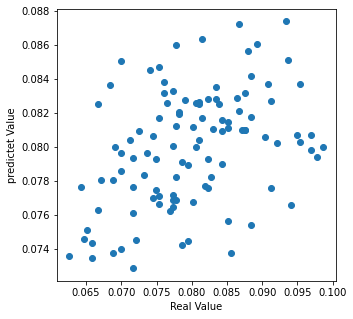

In [ ]:
plt.scatter(y_train, ybar)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

In [ ]:
print("The Train Score is ", (r2_score( y_train, ybar)))

The Train Score is  0.15773173493814419


مدل چقدر خوب حدس می زند؟

In [ ]:
# evaluate the model
yhat = model.predict(X_test)

In [ ]:
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' %mae)

MAE: 0.006


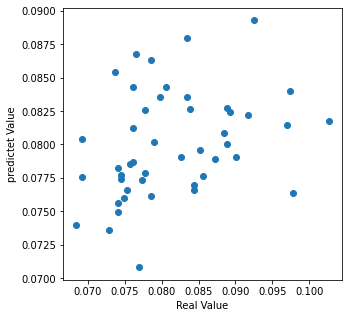

In [ ]:
plt.scatter(y_test,yhat)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

In [ ]:
print("The Predict Score is ", (r2_score( y_test,yhat)))


The Predict Score is  0.05470231154398297


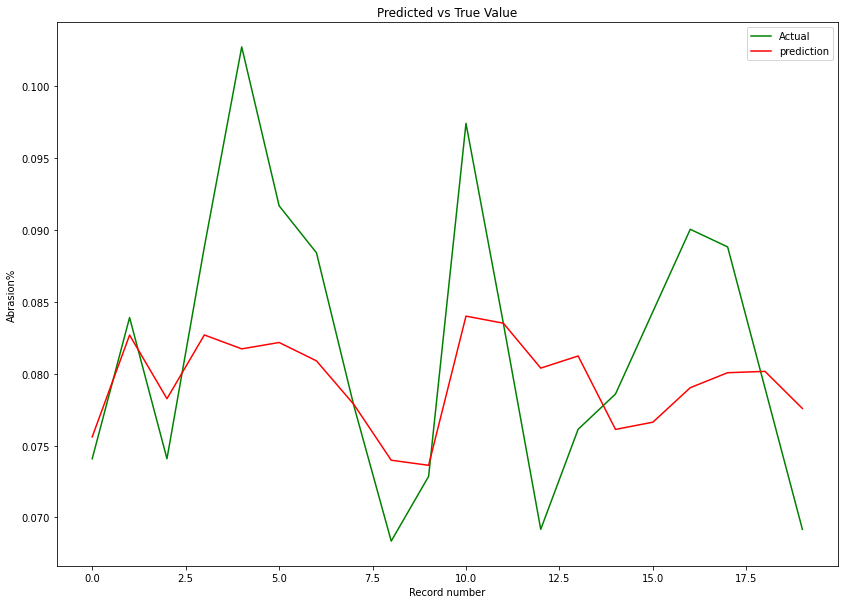

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# استفاده از شبکه عصبی برای حل مسئله و حدس زدن جواب نمونه های آزمایشی

In [ ]:
model = MLPRegressor(hidden_layer_sizes=(100,),activation="relu" ,random_state=1, max_iter=200000)
model.fit(X_train, y_train)


MLPRegressor(max_iter=200000, random_state=1)

مدل چقدر خوب آموزش دیده است؟

In [ ]:
ybar = model.predict(X_train)

In [ ]:
# evaluate predictions
mae = mean_absolute_error(y_train, ybar)
print('MAE: %.3f' %mae)

MAE: 0.034


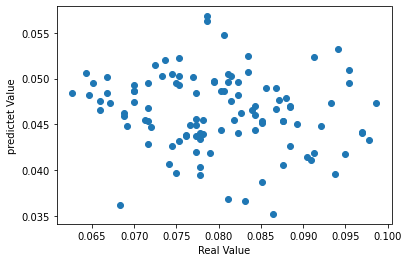

In [ ]:
plt.scatter(y_train, ybar)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

In [ ]:
print("The Train Score is ", (r2_score( y_train, ybar)))

The Train Score is  -15.771030515042895


مدل چقدر خوب حدس می زند؟

In [ ]:
# evaluate the model
yhat = model.predict(X_test)

In [ ]:
print("The Train Score is: ", (r2_score( y_test,yhat)))

The Train Score is:  -18.57536995077344


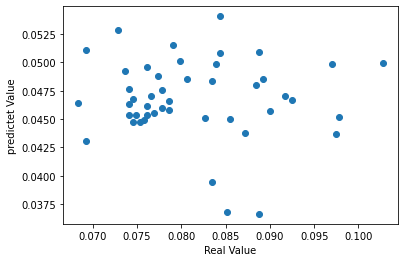

In [ ]:
plt.scatter(y_test,yhat)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

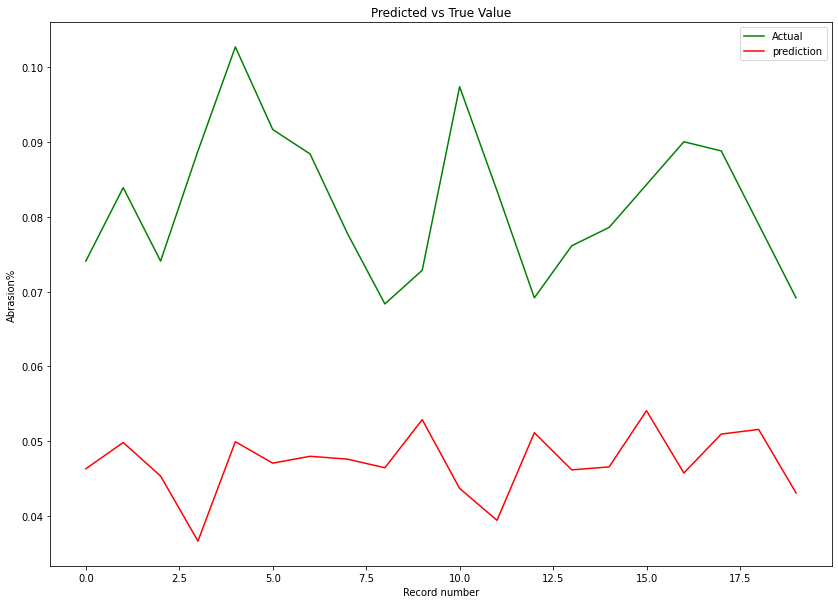

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# Decision Tree Regression

In [ ]:
model = DecisionTreeRegressor(random_state=123)
model = model.fit(X_train,y_train)

In [ ]:
print("Accuracy on test: {:.2f} %".format(model.score(X_test, y_test)*100))

Accuracy on test: -141.50 %


In [ ]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: -141.50%
Mean Absolute Error 0.01
Mean Squared Error 0.00


In [ ]:
model.feature_importances_

array([0.06711519, 0.02963798, 0.27115649, 0.0333697 , 0.08013095,
       0.24495739, 0.01376754, 0.0410451 , 0.09392712, 0.12489255])

(-1.0, 10.0)

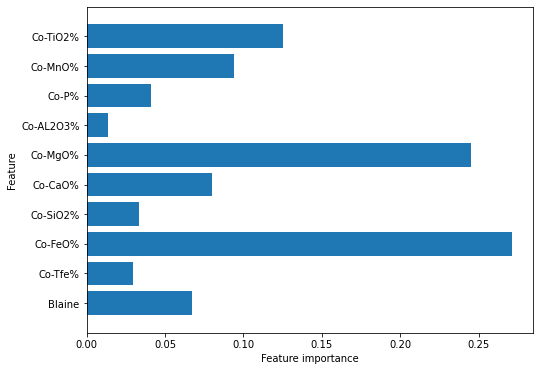

In [ ]:
plt.figure(figsize=(8,6))
n_features = len(col)-1
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(len(col)-1), col[:-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

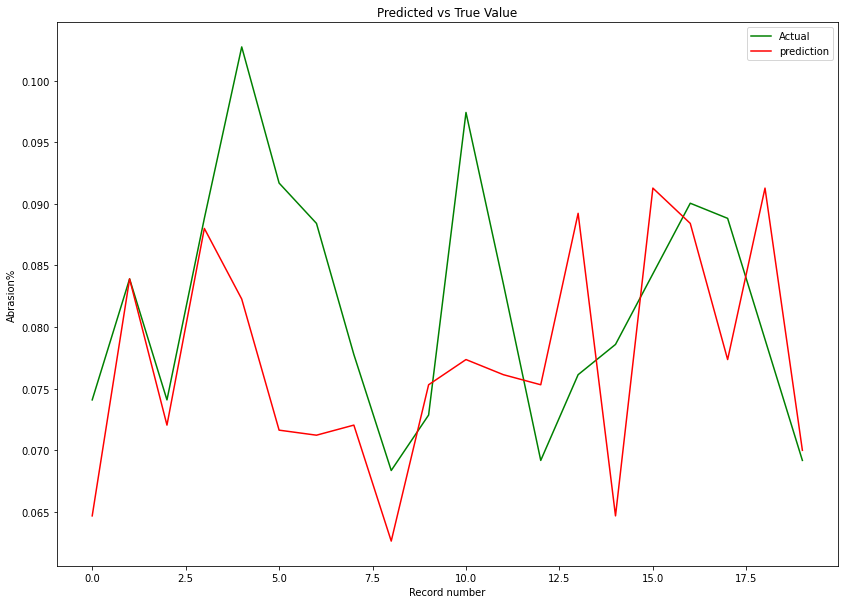

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# Support Vector Regression

In [ ]:
model=SVR()
model.fit(X_train,y_train)

SVR()

In [ ]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score -1.00 %



In [ ]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: -1.00%
Mean Absolute Error 0.01
Mean Squared Error 0.00


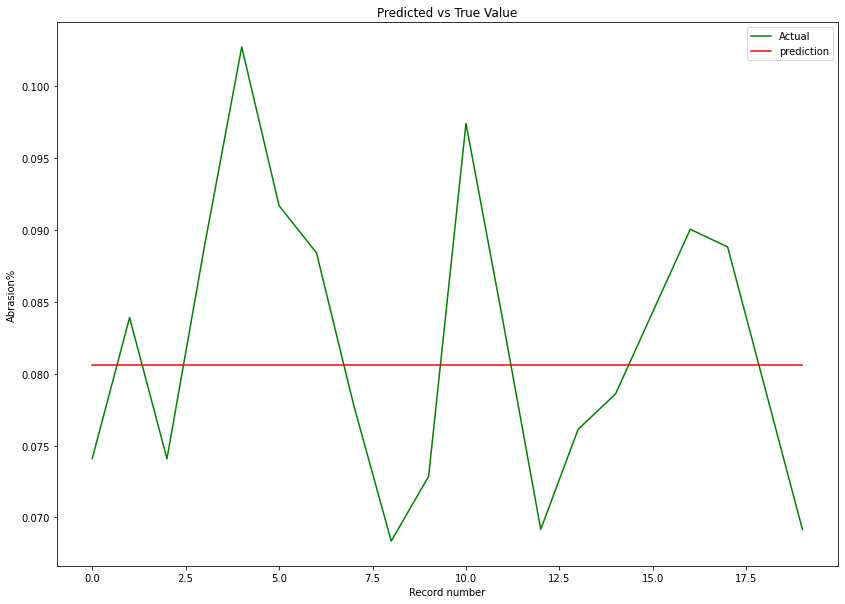

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# K-Nearest Neighbor Regressor

In [ ]:
model=KNeighborsRegressor(n_jobs=-1)
model.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1)

In [ ]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score -7.99 %



In [ ]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: -7.99%
Mean Absolute Error 0.01
Mean Squared Error 0.00


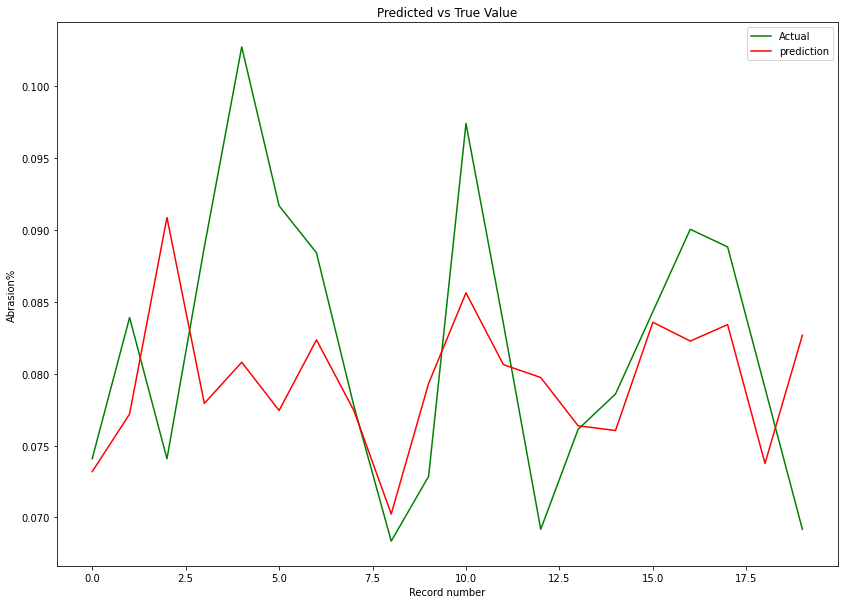

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

# Random Forest Regressor

In [ ]:
model = RandomForestRegressor(n_jobs = -1,random_state = 123)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=123)

In [ ]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 0.91 %



In [ ]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 0.91%
Mean Absolute Error 0.01
Mean Squared Error 0.00


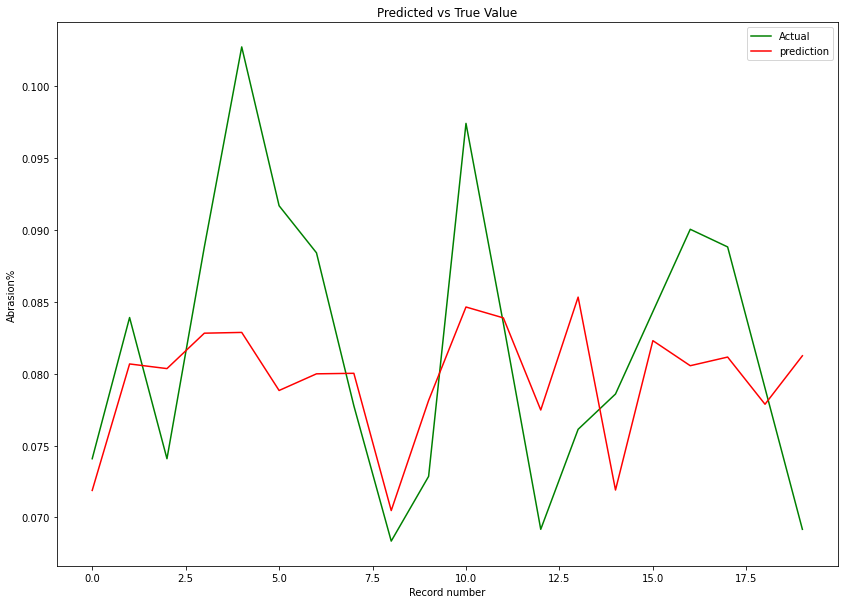

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

(-1.0, 10.0)

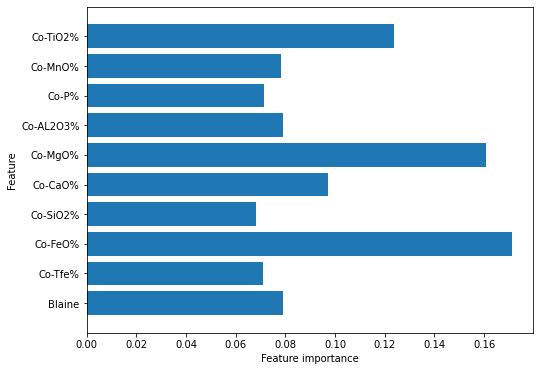

In [ ]:
plt.figure(figsize=(8,6))
n_features = len(col)-1
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(len(col)-1), col[:-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

# Gradient Boosting Regressor

In [ ]:
model = GradientBoostingRegressor(random_state = 123)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=123)

In [ ]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score -16.17 %



In [ ]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: -16.17%
Mean Absolute Error 0.01
Mean Squared Error 0.00


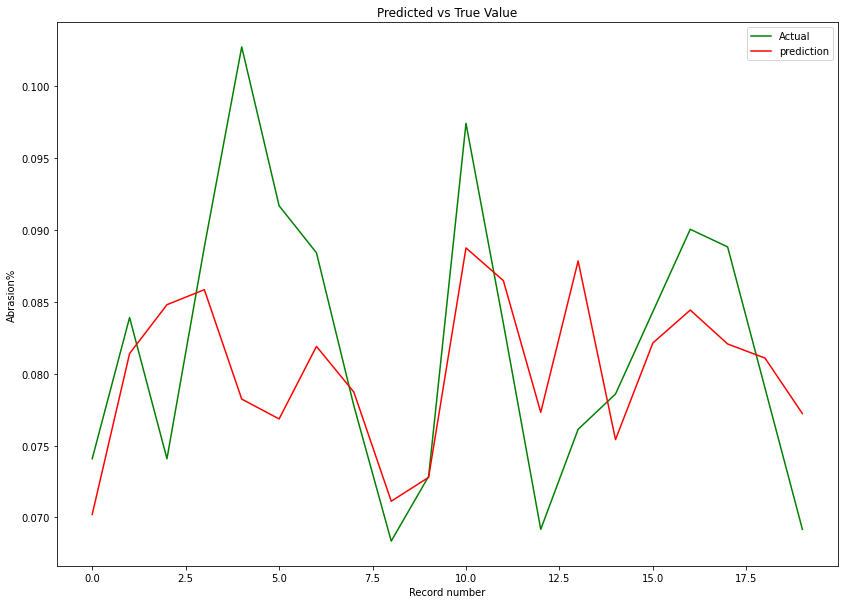

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()

(-1.0, 10.0)

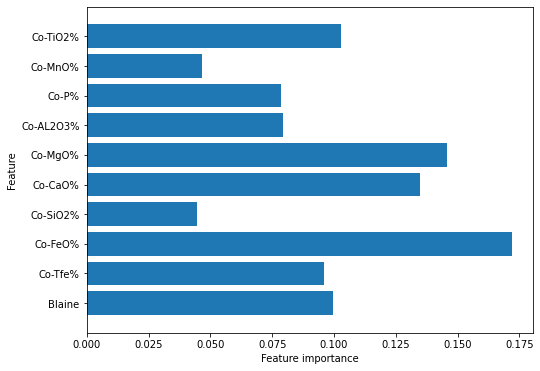

In [ ]:
plt.figure(figsize=(8,6))
n_features = len(col)-1
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(len(col)-1), col[:-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

# Extreme Gradient Boosting Regressor

In [ ]:
model = XGBRegressor(random_state = 123,n_jobs=-1)
model.fit(X_train, y_train)

[05:47:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_jobs=-1, random_state=123)

In [ ]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 12.09 %



In [ ]:
y_pred = model.predict(X_test)
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 12.09%
Mean Absolute Error 0.01
Mean Squared Error 0.00


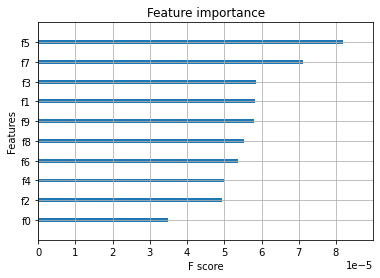

In [ ]:
xgb.plot_importance(model,importance_type="gain",show_values=False)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

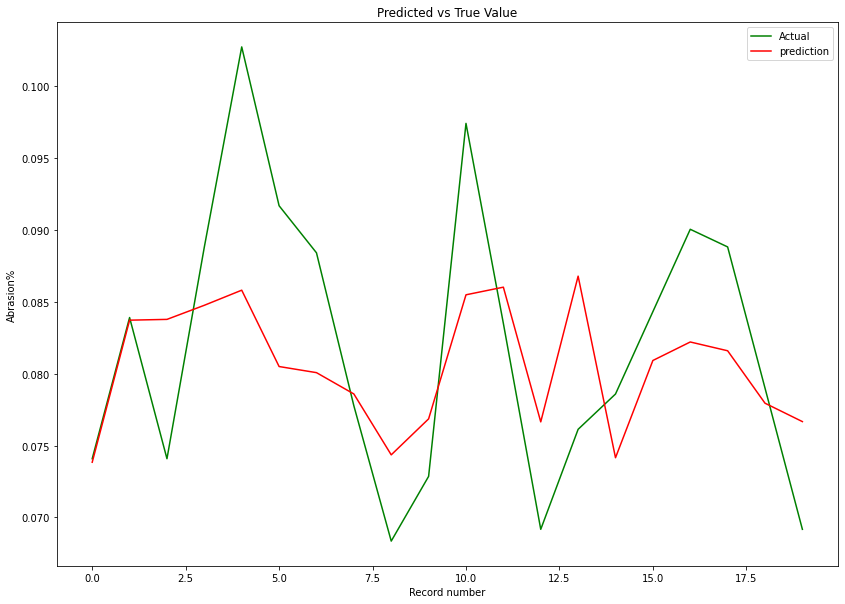

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()